In [1]:
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
df = pd.read_csv(r'players_21.csv')

In [2]:
#Deleting unnecessary columns
delete = ["player_url","sofifa_id","long_name","age","dob","height_cm","weight_kg","league_rank","team_position","nationality","value_eur","wage_eur","international_reputation","body_type","real_face","release_clause_eur","team_jersey_number","loaned_from","joined","contract_valid_until","nation_position","nation_jersey_number","defending_marking","goalkeeping_diving","goalkeeping_handling","goalkeeping_kicking","goalkeeping_positioning","goalkeeping_reflexes","potential","ls","rs","lw","lf","st","cf","rf","rw","lam","cam","ram","lm","lcm","cm","rcm","rm","lwb","ldm","cdm","rdm","rwb","lb","lcb","cb","rcb","rb"]
df.drop(columns = delete, inplace = True)
df["defending_marking"] = df["defending_standing_tackle"]

#Grouping leagues and club names
grouped = df.groupby(df["club_name"])
club = df["club_name"].value_counts()
league = df["league_name"].value_counts()
league = dict(league)
league_n = list(league.keys())
league_n = sorted(league_n)
club = dict(club)
club_n = list(club.values())
club_k = list(club.keys())

#Enter team names
#inputs = input("Enter team 1: ")
#inputs2 = input("Enter team 2: ")
inputs = "Manchester United"
inputs2 = "Leicester City"
for i in range(len(club_k)):
    if inputs == club_k[i]:
        club1 = grouped.get_group(club_k[i])
    if inputs2 == club_k[i]:
        club2 = grouped.get_group(club_k[i])

#Sort the team based on their overall ratings
club1 = club1.sort_values('overall',ascending=False)
club1.reset_index(drop=True, inplace=True)
club2 = club2.sort_values('overall',ascending=False)
club2.reset_index(drop=True, inplace=True)
plotting = club1
plotting2 = club2
overall = list(club1["overall"])
overall2 = list(club2["overall"])
pos = list(club1["player_positions"])
pos2 = list(club2["player_positions"])

def best_eleven(pos):
    keep = []
    de = []
    st = 0
    mid = 0
    deb = 0
    gk = 0
    for i in range (len(pos)):
        if (st < 3) and ('ST' in pos[i] or 'RW' in pos[i] or 'LW' in pos[i] or 'CF' in pos[i]):
            keep.append("fw")
            st = st + 1
        elif (gk == 0) and ('GK' in pos[i]):
            keep.append("gk")
            gk = 1
        elif (mid < 3) and ('RM' in pos[i] or 'LM' in pos[i] or 'CM' in pos[i] or 'CAM' in pos[i] or 'CDM' in pos[i]):
            keep.append("mid")
            mid = mid + 1
        elif (deb < 4) and ('CB' in pos[i] or 'RB' in pos[i] or 'LB' in pos[i] or 'LWB' in pos[i] or 'RWB' in pos[i]):
            keep.append("def")
            deb = deb + 1
        else:
            de.append(i)
    return de, keep

#de = delete players, keep = keep players
de,keep = best_eleven(pos)
de2,keep2 = best_eleven(pos2)

club1 = club1.drop(labels=de, axis=0)
club1.reset_index(drop=True, inplace=True)
club2 = club2.drop(labels=de2, axis=0)
club2.reset_index(drop=True, inplace=True)
club1["player_pos"] = keep
club2["player_pos"] = keep2
del club1["player_positions"]
del club2["player_positions"]

c = []

for i in range (len(plotting)):
    c.append(i)
plotting["index2"] = c
plotting2["index2"] = c

Text(0, 0.5, 'Overall')

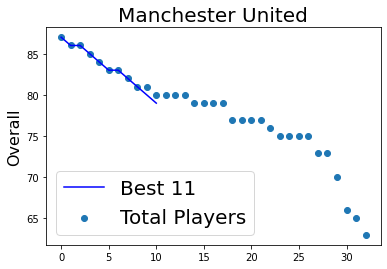

In [3]:
#Best eleven plot 1
plt.scatter(plotting["index2"],plotting["overall"], label = "Total Players")
club1["overall"].plot(label = "Best 11", c = "blue")
plt.legend(fontsize = 20)
plt.title("Manchester United", fontsize = 20)
plt.ylabel("Overall", fontsize = 16)

Text(0, 0.5, 'Overall')

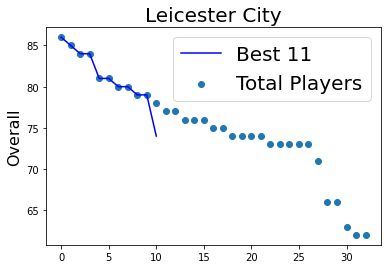

In [4]:
#Best eleven plot 2
plt.scatter(plotting2["index2"],plotting2["overall"], label = "Total Players")
club2["overall"].plot(label = "Best 11", c = "blue")
plt.legend(fontsize = 20)
plt.title("Leicester City", fontsize = 20)
plt.ylabel("Overall", fontsize = 16)